# Predicting Taipei Housing Prices

### Introduction: 

In this project, we will develop and evaluate the performance and the predictive power of a model trained and tested on data collected from Taipei.  A model trained on this data, that is seen as a good fit, could then be used to predict the monetary value of a house located at the Taipei’s area. This model would prove to be valuable to for real estate agents who could make use of this information on a daily basis. 

You can find the complete project, documentation and dataset on my GitHub page:<br>
https://github.com/rromanss23/Machine_Leaning_Engineer_Udacity_NanoDegree/tree/master/projects/boston_housing

The dataset for this project was collected from UCI Machine Learning Repository, and it was collected from Sindian Dist., New Taipei City, Taiwan.<br>
https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

The inputs are as follows:
- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude. (unit: degree)
- X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow:
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

****
For the purpose of this project, we will pick the following features to use in this project<br>
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)

Our target will be: <br>
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

****
Note: Features are usually distinct observations that describe the dataset in a qunatitative manner (either real value, boolean, discrete value). Target is the quantitity you want to predict from the data. 

### Getting Started

Before we begin, we want to importing the libraries required for this project. <br>

In [13]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import sklearn training and testing data splitter
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs
import matplotlib.pyplot as plt
import seaborn as sns

We will be using a library called 'Visuals', which is no longer offered in Python 3 standard library. Hence we have manually added this library to the root folder this .ipnyb resides as visuals_md.py. Having this .py inside the root folder of .ipnyb, will enable us to import this library. 

### Loading Dataset

In [14]:
# Pretty display for notebooks
%matplotlib inline
sns.set_style("whitegrid")

# Load the Boston housing dataset
data = pd.read_csv('C:\\Users\\sang_\\Udacity\\Taipei housing master\\Taipei housing master\\Taipei housing master\\Real estate valuation data set - Taipei.csv')
prices = data['Y house price of unit area']
features = data.drop('Y house price of unit area', axis = 1)
    
# Success
print("Taipei housing dataset has {} data points with {} variables each.".format(*data.shape))

Taipei housing dataset has 414 data points with 4 variables each.


### 1.0 Data Exploration

In this section, we will perform a cursory investigation of the dataset by calculating basic statistic information to get a high-level observation.  This would include calculating: Minimum price, Maximum price, Mean price, Median price, Standard deviation of prices. 

In [15]:
# Minimum price of the data
minimum_price = prices.min()

# Maximum price of the data
maximum_price = prices.max()

# Mean price of the data
mean_price = prices.mean()

# Median price of the data
median_price = prices.median()

# Standard deviation of prices of the data
std_price = prices.std()

# Show the calculated statistics
print("Statistics for Taipei housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Taipei housing dataset:

Minimum price: $7.6
Maximum price: $117.5
Mean price: $37.98019323671498
Median price $38.45
Standard deviation of prices: $13.606487697735314


### 2.0 Feature Observation

As part of initial data observation, it would be informative for us to understand how each feature impacts the target. This relationship can be explored by identifying whether a feature has negative or positive correlation with the target, which we can easily calculate by using scikit's Pearson's Coefficient correlation method. 

In statistics, the Pearson correlation coefficient is a measure of the linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. <br>
- Positive Correlation: r > 0
- No Correlation: r = 0
- Negative Correlation: r < 0

#### 2.1 Relationship between feature X2 house age VS target Y house price of unit area

In [16]:
data[["X2 house age", "Y house price of unit area"]].corr(method="pearson")

,X2 house age,Y house price of unit area
X2 house age,1.000000,-0.210567
Y house price of unit area,-0.210567,1.000000


The Pearson's Coeffecient r = -0.210567 < 0. This indicates negative correlation. Hence as X2 house age increases Y house price of unit area decreases.

#### 2.2 Relationship between feature X3 distance to the nearest MRT station VS target Y house price of unit area

In [17]:
data[["X3 distance to the nearest MRT station", "Y house price of unit area"]].corr(method="pearson")

,X3 distance to the nearest MRT station,Y house price of unit area
X3 distance to the nearest MRT station,1.000000,-0.673613
Y house price of unit area,-0.673613,1.000000


The Pearson's Coeffecient r = -0.673613 < 0. This indicates negative correlation. Hence as X3 distance to the nearest MRT station increases Y house price of unit area decreases.

#### 2.3 Relationship between feature X4 number of convenience stores VS target Y house price of unit area

In [18]:
data[["X4 number of convenience stores", "Y house price of unit area"]].corr(method="pearson")

,X4 number of convenience stores,Y house price of unit area
X4 number of convenience stores,1.000000,0.571005
Y house price of unit area,0.571005,1.000000


The Pearson's Coeffecient r = 0.571005 > 0. This indicates positive correlation. Hence as X4 number of convenience stores increases Y house price of unit area increases.

### 3.0 Define Performance Metric 
Before we develop our model, we want to have a performance metric set up to evaluate our model's performance. This is important to ensure we have high quality predictions, reinforcing our confidence in our model. 

R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. A value of 0 indicates that the model always fails to predict the target/actual value and a value of 1 indicates the model prefectly predicts the target value.

In [19]:
# Import 'r2_score'
from sklearn.metrics import r2_score


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [20]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


The model above has a high R2 score of 0.923 indicating that the dependent variable can be predicted from the independent variable and 92.3% of the variance in the target variable can be captured by the model. Hence I would consider this model to be successful in capturing the variation of the target variable

### 4.0 Implementation: Shuffle and Split Data

We will now take the Taipei housing dataset and split the data into training and testing subsets. It is also a good idea to shuffle the data into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset. 

In [21]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### 5.0 Analyze Model Performance

An important aspect of model complexity is that the optimal model will generally depend on the size of your training data. So in this section, we will take a look at several model's learning and testing performances on various subsets of training data. 

When we train our dataset, there can be 2 different situations: <br>
 - underfitting a large data: this means that the training score will decrease, but the validation score will increase.
 - overfitting a small dataset: this means that the training score will be realtively high, while the validation score will be relatively low. 
 - What we want is a right balance between bias and variance, neither underfitting or overfitting.
 
A model will never, except by change, give a better score to the validation set than the training set, this means the curves should keep getting close together but never cross. 

### 5.1 Assessing Model Complexity - Method 1: Learning Curves

For us to better assess complexity of a model and how it affects performance, we will assign a max_depth parameter (complexity degree of the model) against a decision tree model. Looking at different training and testing results against different complexity degrees will enable us to determine the optimal complexity level we should assign against our decision tree model for best performance.

C:\Users\sang_\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\sang_\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\sang_\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\sang_\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\sang_\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg,

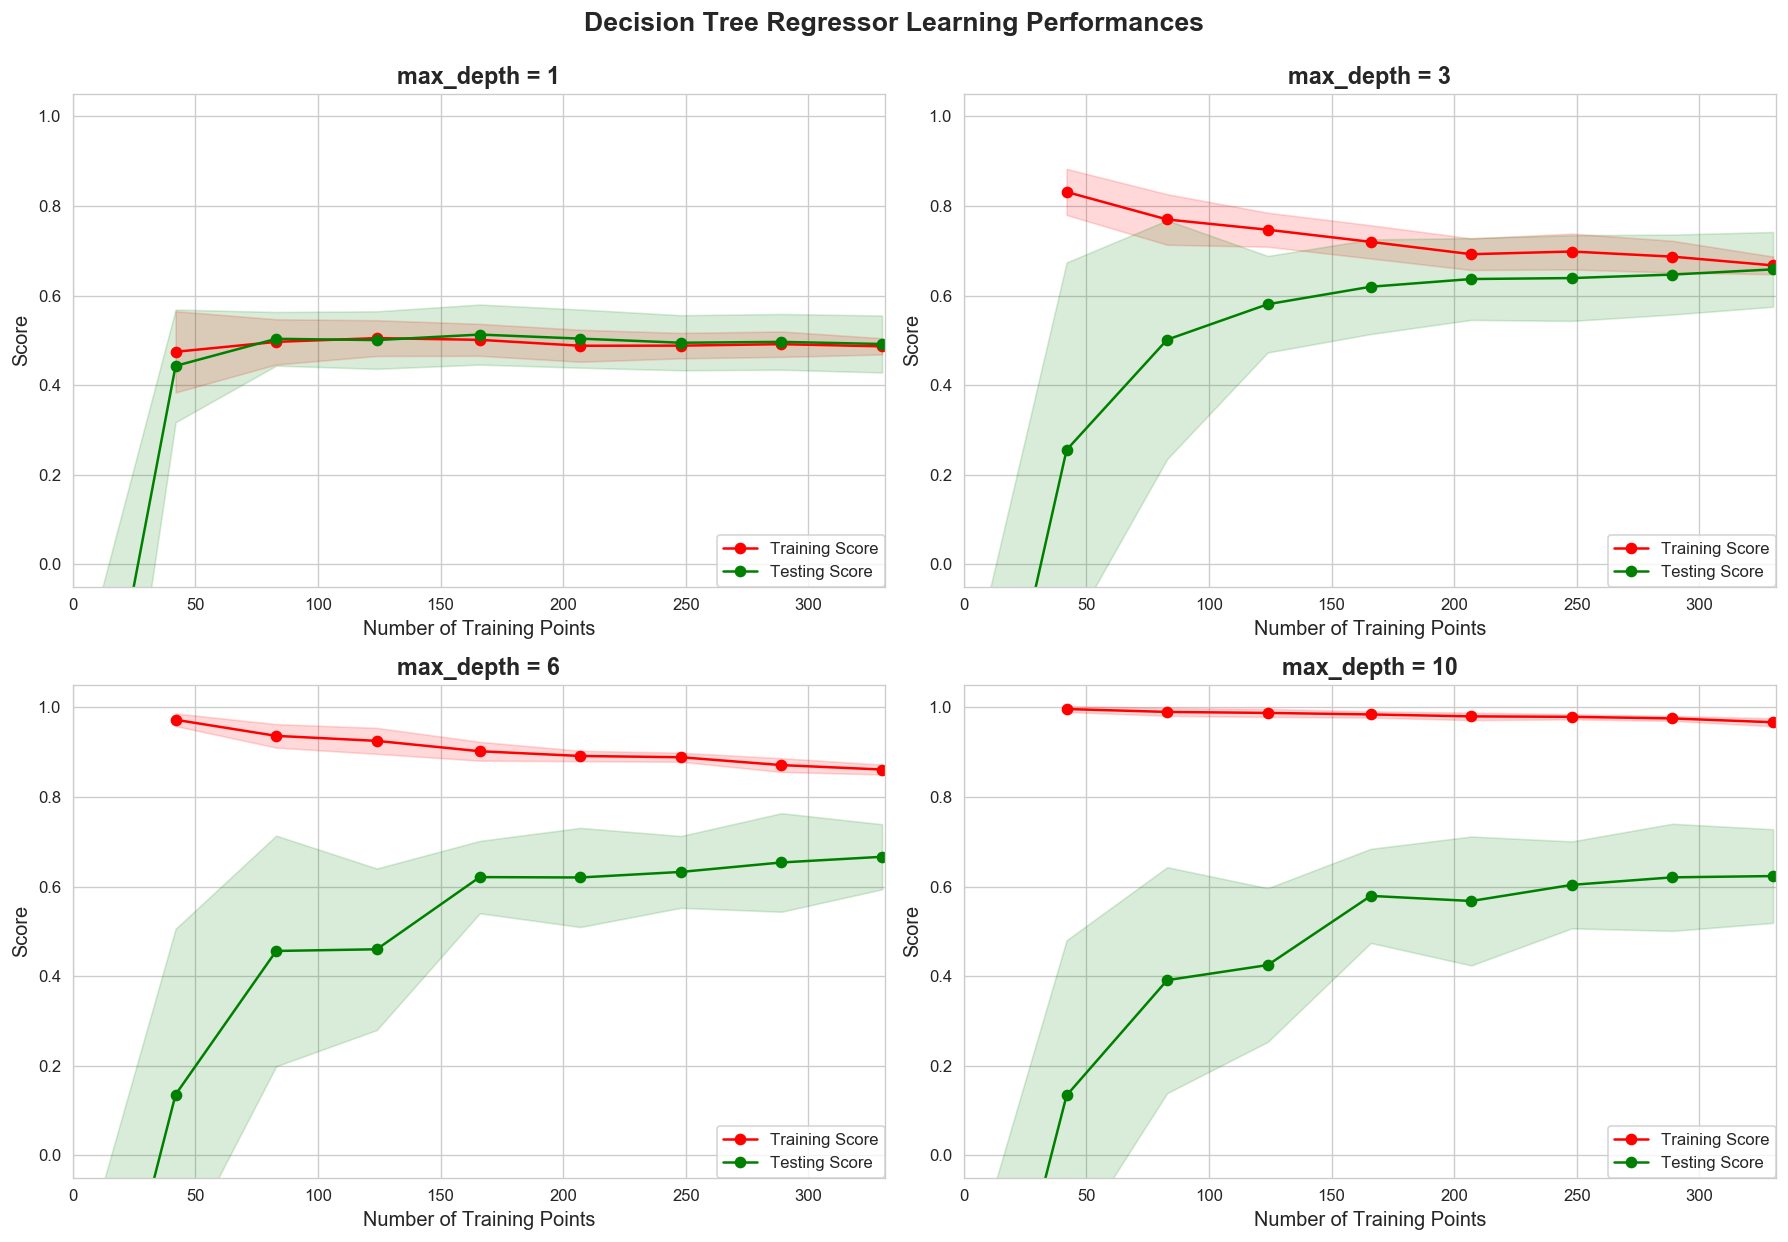

In [22]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

Looking at the graphs above, we would choose the graph with max_depth=3, as the number of trainig points increases and the training score decreases (both scores converging). Also, starting 300 points threshold, having more training points will not benefit the model.

### 5.2 Assessing Model Complexity - Method 2: Complexity Curves

The following code cell produces a graph for a decision treel model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves, one for training and one for validation. Similar to learning curves, the shaded regions of both the complexity curves denote the undertainityy in those curves, and the model is scored on both the training the validation sets using the performance_metric function.

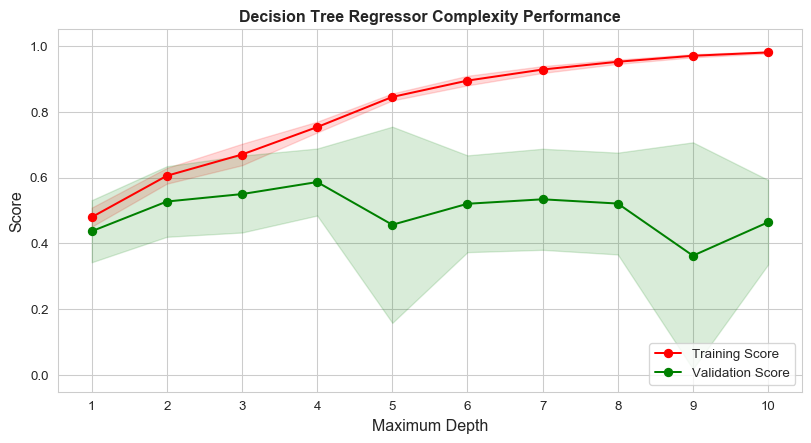

In [23]:
# Produce model complexity validation curve
vs.ModelComplexity(X_train, y_train)

#### Bias-Variance Tradeoff

- When the model is trained with a maximum depth of 1 the model suffers from high bias and low variance i.e. underfitting. The model will not be complex enough and will be too generalized. You can see this in the graph at max_depth=1, where the validation and training scores both are low. Low training scores indicate high bias. 
- When the model is trained with a maximum depth of 10 the model suffers from high variance and low bias i.e. overfitting. The model will memorize the data and cannot generalize enough. You can see this in the graph at max_depth=10, where the validation and training scores both diverge heavily and the training score increases to almost 1 and the validation score decreases indicating high variance.

### 5.3 Best-Guess Optimal Model for a Decision Tree

Based on our assessments above, a maximum depth of 3 or 4 best generalizes the unseen data.
Based on the model complexity graph above, at max_depth=3 the training score and the validation scores almost converge and are at the optimal value. After depth 4 they start to diverge and at depth 10 the training score is very high and validation score is very low indicating overfit.

-----

### 6.0 Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

##### Part 1 of fit_model method: perform Grid Search

Grid Search is a technique to tune the hyper-parameters and find the best optimized model. If we have a set of models (which differ from each other in their parameter values, which lie on a grid), we then train each of the models and evaluate it using cross-validation. We then select the model with best cross-validation score. For example, in our model to find the best maximum depth we can do a grid search with various maximum depths and then select the best optimized value for maximum depth.

What we have done in section 5.1, 5.2, 5.3 is meant to give us some inuition into the trade off between bias and variance. In pracitce, models could be more complex, and validation and learning curves could change from lines to multidimensional surfaces. 

Scikit-Learn provides automated tools to do this in the grid_search module. 

##### Part 2 of fit_model: perform Cross-Validation

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized sub-samples.Of the k sub-samples,a single sub-sample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data.The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data.The k results can then be averaged to produce a single estimation as the overall result of the model. 

The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once and also it does not waste too much data which is a major advantage in problems where the number of samples is very small.

### 6.1 Implementation: Fitting a Model

In [24]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


def fit_model(X, y):
    """ 
    Performs grid search over the 'max_depth' parameter for a 
    decision tree regressor trained on the input data [X, y].
    """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1, 11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor,
                        param_grid=params,
                        scoring =scoring_fnc,
                        cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    # Prepare the grid search table
    depths = [d['max_depth'] for d in grid.cv_results_["params"]]
    scores = grid.cv_results_["mean_test_score"]
    df = pd.DataFrame({"max_depth": depths, "mean_test_score": scores}, 
                      columns=["max_depth", "mean_test_score"])
        
    # Return the optimal model after fitting the data
    return grid.best_estimator_, df

### 6.2 Select Optimal Model


In [25]:
from IPython.core.display import HTML

# Fit the training data to the model using grid search
reg, grid_table = fit_model(X_train, y_train)

# Display the grid search result table
display(HTML(grid_table.to_html(index=False)))

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

max_depth,mean_test_score
1,0.436937
2,0.527096
3,0.549703
4,0.586263
5,0.557723
6,0.518502
7,0.504333
8,0.488504
9,0.468737
10,0.469407


Parameter 'max_depth' is 4 for the optimal model.


### 7.0 Predicting Selling Prices

In [26]:
# Produce a matrix for client data
client_data = [[5, 100, 2], # Client 1
               [15 ,200, 5], # Client 2
               [25, 300, 10]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $52.72
Predicted selling price for Client 2's home: $44.17
Predicted selling price for Client 3's home: $44.17
